# Série de Taylor exponencial

## Função

Escolhemos a função exponencial:

$f(x) = e^x$

para apresentar uma simulação de cálculos e funções complexas que podem ser processadas.

### Série de taylor para função exponencial:

${\displaystyle \mathrm {e} ^{x}=\sum _{n=0}^{\infty }{\frac {x^{n}}{n!}}\quad}$ para todo $x$

Determinaremos um valor limite de N com base em sua precisão e margem de erro.

## To-Do (Criar Issues):
- Cálculo de Taylor para a função
  - Derivadas
  - Valor de N da série de Taylor
  - Código da função
- Aproximações e propriedades da função
- Tabela de valores fixos

## Definindo a função

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
import math

def e_x(x, n_max = 20):
    total = 0.0
    for n in range(0, n_max ):
        numero = (x**n)/math.factorial(n)
        total += numero
    return total

print(e_x(5))
print(np.exp(5))

148.4131078683383
148.4131591025766


## Comparação entre as funções 

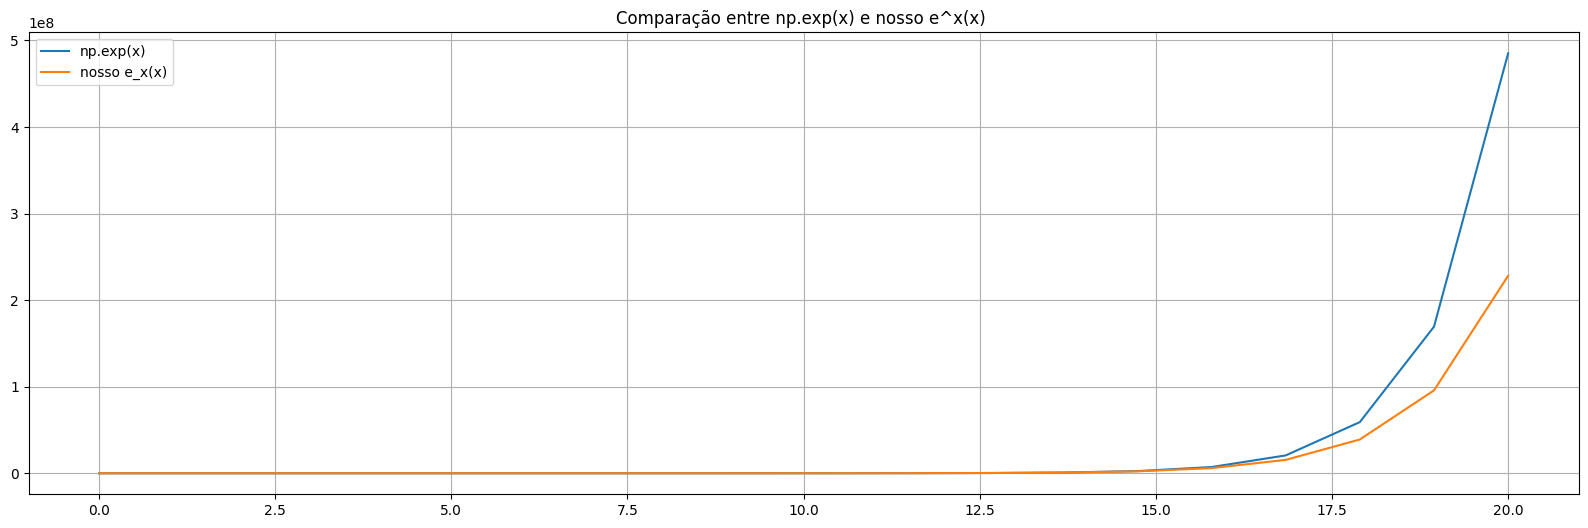

In [75]:
valor_x = np.linspace(0, 20, 20)
f1_valores = [np.exp(x) for x in valor_x]
f2_valores = [e_x(x) for x in valor_x]
plt.figure(figsize=(20, 6))
plt.plot(valor_x, f1_valores, label='np.exp(x)')
plt.plot(valor_x, f2_valores, label='nosso e_x(x)')
plt.legend()
plt.title('Comparação entre np.exp(x) e nosso e^x(x) ')
plt.grid(True)
plt.show()

**Observação.:** Quanto maior o seu valor de X, maior o seu N deverá ser para ser mais preciso

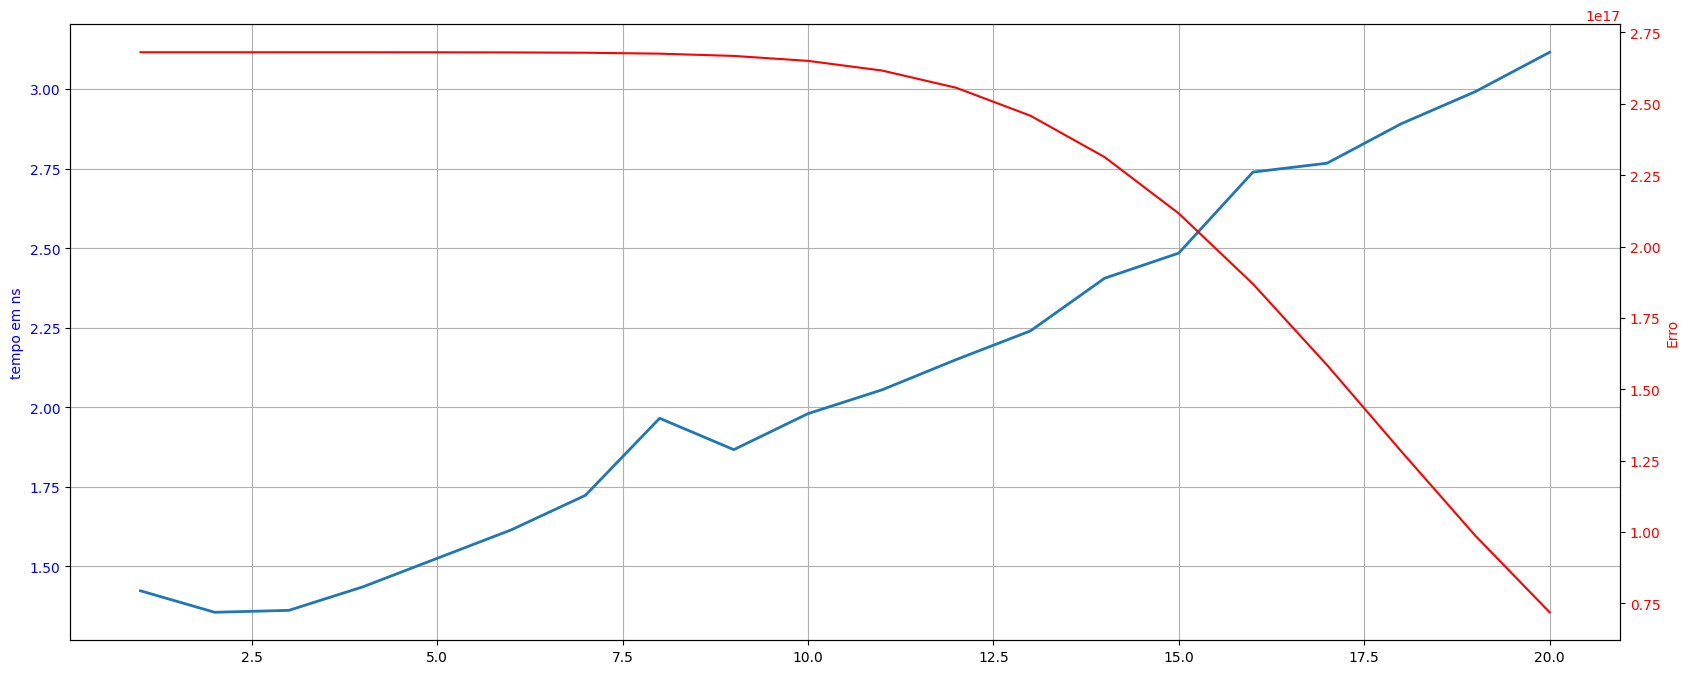

In [78]:
import numpy as np

n_max = 20

enes = np.arange(1,n_max+1)
medias = np.zeros(n_max)
error = np.zeros(n_max)
x = np.linspace(0, 20, 20)


def tempo(x,n):
  start = timeit.default_timer()
  valor = e_x(x,n)
  loss_function = pow(valor - np.exp(x),2) # erro quadrático
  return timeit.default_timer() - start, loss_function

# https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html
tempo_vector = np.vectorize(tempo)
for n in enes:
  calc, erro = tempo_vector(x,n)
  medias[n-1] = np.mean(calc)*1000*1000 # microssegundos
  error[n-1] = np.sum(erro)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(20,8)
ax.plot(enes, medias, linewidth=2.0)
ax.grid()
color = "blue"
ax.set_ylabel('tempo em ns', color=color)
ax.tick_params(axis='y', labelcolor=color)

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

# plotando 2 gráficos com escalas diferentes
color = "red"
ax2.set_ylabel('Erro', color=color)
ax2.plot(enes, error, color=color)
ax2.tick_params(axis='y', labelcolor=color)

A partir do gráfico, é possível observar que o valor de N mais ideal em relação a Tempo de Execução x Taxa de Erro é, em média 16.

## Propriedades de $f(x) = e^x$

## Tabela de valores

# Referências

- [Séries de Taylor - Wikipédia](https://pt.wikipedia.org/wiki/S%C3%A9rie_de_Taylor)
- [Expansão de e^x](https://www.youtube.com/watch?v=QfU-7XdKW5c)
- [Séries de Taylor com cosseno](https://colab.research.google.com/drive/14a6wnOOOv8yzfvRtfHvMoGIkOAIQnoJN?usp=sharing#scrollTo=AC1IYWaWYTcF)